In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
#Create synthetic datapoints
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_classes=2,n_clusters_per_class=2)

In [40]:
pd.DataFrame(X)

,0,1
0,0.902769,-0.949611
1,-0.527287,-0.470168
2,-1.286672,2.354624
3,-0.959187,-1.007060
4,1.023573,0.557023
...,...,...
995,-1.177286,2.135733
996,-0.895204,-0.958305
997,1.464470,2.284715
998,-1.287841,-0.164186


<Axes: xlabel='0', ylabel='1'>

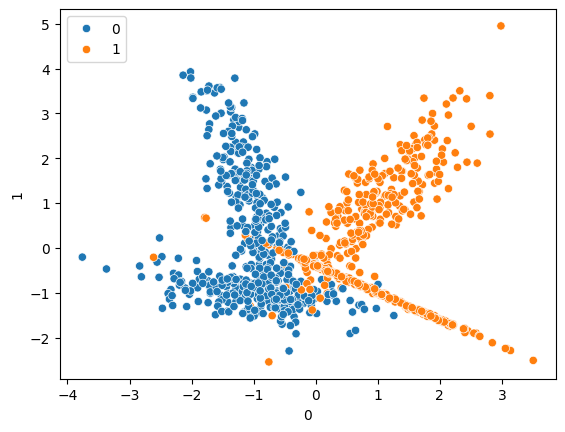

In [41]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [43]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [44]:
y_pred = svc.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[120   4]
 [  9 117]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       124
           1       0.97      0.93      0.95       126

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [47]:
rbf= SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred1 = rbf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[122   2]
 [  8 118]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       124
           1       0.98      0.94      0.96       126

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [50]:
poly= SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred2 = poly.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[106  18]
 [  4 122]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.91       124
           1       0.87      0.97      0.92       126

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250



In [51]:
sig= SVC(kernel='sigmoid')
sig.fit(X_train,y_train)
y_pred3 = sig.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[112  12]
 [ 20 106]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       124
           1       0.90      0.84      0.87       126

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



In [53]:
from sklearn.model_selection import GridSearchCV

#Defining parameter range
param = {'C': [0.1,1,10,100,1000],
         'gamma': [1,0.1,0.01,0.001,0.0001],
         'kernel': ['rbf']}

In [54]:
grid = GridSearchCV(SVC(),param_grid=param,refit=True,cv=5,verbose=3)

In [55]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [56]:
grid.best_score_

0.9586666666666666

In [57]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [58]:
y_pred4 = grid.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[123   1]
 [  8 118]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       124
           1       0.99      0.94      0.96       126

    accuracy                           0.96       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.97      0.96      0.96       250

